The goal of this notebook is, for a fixed classifier,
to understand the variables and their importance on the prediction

In [665]:
import numpy as np  
import pandas as pd  
import math as math

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

from xgboost import XGBRegressor


import matplotlib.pyplot as plt
import seaborn as sns


In [595]:
data_titanic_train    = pd.read_csv('train.csv')
#data_titanic_train    = pd.read_csv('/kaggle/input/titanic/train.csv')
data_titanic_train.head()

data_titanic_test     = pd.read_csv('test.csv')
#data_titanic_train    = pd.read_csv('/kaggle/input/titanic/test.csv')
data_titanic_test.head()

 
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [596]:
data_titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [597]:
data_titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [662]:
# 1 clean the data:

# a) NANs

print( 'number of nan vals in Survived train: '+ str(data_titanic_train.Survived.isna().sum()))

print( 'number of nan vals in Pclass  train: '+ str(data_titanic_train.Pclass.isna().sum()))
print( 'number of nan vals in Pclass  test: '+ str(data_titanic_test.Pclass.isna().sum()))

print( 'number of nan vals in Age train: '+ str(data_titanic_train.Age.isna().sum()))
print( 'number of nan vals in Age test: '+ str(data_titanic_test.Age.isna().sum()))

print( 'number of nan vals in SibSp train: '+ str(data_titanic_train.SibSp.isna().sum()))
print( 'number of nan vals in SibSp test: '+ str(data_titanic_test.SibSp.isna().sum()))

print( 'number of nan vals in Parch train: '+ str(data_titanic_train.Parch.isna().sum()))
print( 'number of nan vals in Parch test: '+ str(data_titanic_test.Parch.isna().sum()))
 
print( 'number of nan vals in Fare train: '+ str(data_titanic_train.Fare.isna().sum()))
print( 'number of nan vals in Fare test: '+ str(data_titanic_test.Fare.isna().sum()))
    
print( 'number of nan vals in Embarked train: '+ str(data_titanic_train.Embarked.isna().sum()))
print( 'number of nan vals in Embarked test: '+ str(data_titanic_test.Embarked.isna().sum()))

number of nan vals in Survived train: 0
number of nan vals in Pclass  train: 0
number of nan vals in Pclass  test: 0
number of nan vals in Age train: 0
number of nan vals in Age test: 0
number of nan vals in SibSp train: 0
number of nan vals in SibSp test: 0
number of nan vals in Parch train: 0
number of nan vals in Parch test: 0
number of nan vals in Fare train: 0
number of nan vals in Fare test: 0
number of nan vals in Embarked train: 0
number of nan vals in Embarked test: 0


/home/jbourg/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


num of nans Age train : 0
num of nans Age test : 0
  
     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  


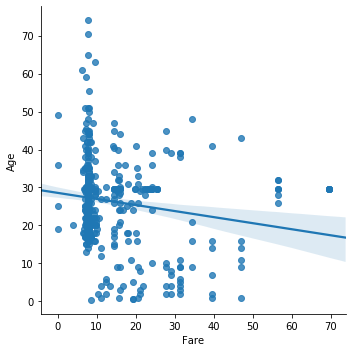

In [599]:
# b) Replace (train and test !)     

Age_mod_train = data_titanic_train.Age.mean()
data_titanic_train.Age.loc[data_titanic_train.Age.isna()] = Age_mod_train
data_titanic_test.Age.loc[data_titanic_test.Age.isna()] = Age_mod_train 
# we assume that computing the mean estimator gives a better resut with train set (bigger)

print( 'num of nans Age train : '+ str(data_titanic_train.Age.isna().sum()) )
print( 'num of nans Age test : '+ str(data_titanic_test.Age.isna().sum()))

A = data_titanic_test.loc[data_titanic_test.Fare.isna()].head(1)
print('  ')
print(A)
# this looks like a worker (Mr, alone,Pclass = 3 ): let's find what are the fares in the third class
     
Third_class = data_titanic_train.loc[data_titanic_train.Pclass == 3]

data        = Third_class[['Fare','Age']]
data.head()
sns.lmplot('Fare','Age',data)



Conclusion: Age and Fare are not really correlated in the third class. Lets use only the mode of the third class for the fare.
    

In [600]:
data_titanic_test.Fare.loc[data_titanic_test.Fare.isna()] = Third_class.Fare.mode().values[0]
# verify that the nan is no longuer there
data_titanic_test.loc[data_titanic_test.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Lets see the nan's in Embarked

In [601]:
data_titanic_train.loc[data_titanic_train.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Is there a port where the rich people embark preferentially ? 

In [602]:
data_titanic_train.loc[data_titanic_train.Pclass == 1].Embarked.describe()

count     214
unique      3
top         S
freq      127
Name: Embarked, dtype: object

In [603]:
data_titanic_train.Embarked.loc[data_titanic_train.Embarked.isna()] = 'S'
# verify that the replacement is ok:
data_titanic_train.Embarked.isna().sum()

0

Two possibilities: intensity or one hot encoding (different columns for different ports)

In [638]:
Original_Frame_train   = data_titanic_train.Embarked
Original_Frame_test    = data_titanic_test.Embarked

Original_Frame_train.unique()

Intensity_Frame_train_Embarked  = Original_Frame_train.map(lambda p:(p =='S')*1 + (p =='C')*2 + (p =='Q')*3)
Intensity_Frame_test_Embarked   = Original_Frame_test.map(lambda p:(p =='S')*1 + (p =='C')*2 + (p =='Q')*3)

OH_encoder  = OneHotEncoder(handle_unknown='ignore', sparse=False)
One_hot_encoding_train_Embarked = pd.DataFrame(OH_encoder.fit_transform(data_titanic_train[['Embarked']]))
One_hot_encoding_train_Embarked.index = data_titanic_train.index

OH_encoder2 = OneHotEncoder(handle_unknown='ignore', sparse=False)
One_hot_encoding_test_Embarked = pd.DataFrame(OH_encoder2.fit_transform(data_titanic_test[['Embarked']]))
One_hot_encoding_test_Embarked.index = data_titanic_test.index

# What about the dummy variable trap ? 

In [605]:
# Replace female by 1, male by 0

print(data_titanic_train.groupby(['Sex']).Survived.mean())


Intensity_Sex_column   = data_titanic_train.Sex.map(lambda p:(p =='male')*0 + (p =='female')*1)
data_titanic_train.Sex = Intensity_Sex_column

Intensity_Sex_column   = data_titanic_test.Sex.map(lambda p:(p =='male')*0 + (p =='female')*1)
data_titanic_test.Sex  = Intensity_Sex_column

data_titanic_test

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.500000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.000000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.000000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.000000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.000000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,29.699118,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",0,29.699118,0,0,359309,8.0500,NaN,S


Now the most difficult variables to clean: cabin, name 

In [606]:
data_titanic_train.Cabin.describe()

# maybe we can drop Cabin, there are a lot of nans
data_titanic_train.Cabin.unique()

# also maybe the nans are correlated with the cheapest rates
data_titanic_train.Cabin.loc[data_titanic_train.Cabin.isna()] = 'M'

data_titanic_train.Cabin.loc[data_titanic_train.Cabin.isna()]
data_titanic_train.Cabin.head()
#data_titanic_train.Cabin.map(lambda p: p[0])

for k in range(len(data_titanic_train.Cabin)):
    str_temp = data_titanic_train.Cabin[k]
    data_titanic_train.Cabin[k] =  str_temp[0]
    
print(data_titanic_train.Cabin[:])

#str1 = data_titanic_train.Cabin[1];

#print(str1[0])

#print(data_titanic_train.Cabin.head(15))

print(data_titanic_train.Cabin.unique())

 ####### test
    
data_titanic_test.Cabin.isna().sum()/len(data_titanic_test.Cabin)
data_titanic_test.Cabin.loc[data_titanic_test.Cabin.isna()] = 'M'
for k in range(len(data_titanic_test.Cabin)):
    str_temp = data_titanic_test.Cabin[k]
    data_titanic_test.Cabin[k] =  str_temp[0]

0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: Cabin, Length: 891, dtype: object
['M' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


/home/jbourg/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/jbourg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/jbourg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [328]:
# name (solution found on the internet): get the titles: 

### Still in progress...


#data_titanic_train.Name.unique()
#List_of_titles = ['Mr.','Mrs.','Dr.','Mme','Miss.',
#                  'Master.','Major.','Don.','Rev.',
#                  'Bishop','Sir','Col','Capt.','Countess.','Jonkheer']

#Title          =  data_titanic_train.Name.copy()
#len(Title)

#for u in range(len(Title)):
#     if data_titanic_train.Name[u] in List_of_titles:
#        print(data_titanic_train.Name[u])


## Forget for now, the main goal is to be able to see the weight of each variable 
## on the final prediction

 Lets iterate over the variables to understand them better

Women did survived much more than man, this is a very good predictor

In [607]:
print(data_titanic_train.groupby(['Pclass']).Survived.mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


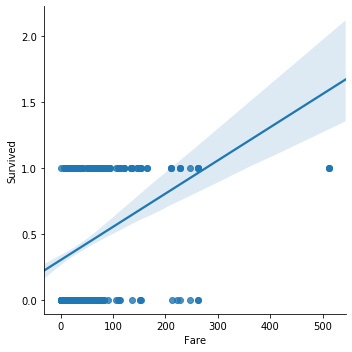

In [608]:
data = data_titanic_train[['Sex','Fare','Survived']]
data.head()
sns.lmplot('Fare','Survived',data)

# the Fare looks less correlated with the Survival, need to do Fare categories

In [609]:
# Explore relationship between port arrival and survival

R = pd.DataFrame({'Survived':data_titanic_train.Survived,
                  'Embarked':Intensity_Frame_train_Embarked}) 
R.groupby('Embarked').mean()                 
                                   
#(p =='S')*1 + (p =='C')*2 + (p =='Q')*3

# people who into port "C" (Cardiff ?) had a better chance to survive

,Survived
Embarked,
1,0.339009
2,0.553571
3,0.389610


In [610]:
data_titanic_train.groupby(['Survived','Sex','Pclass']).mean()

PassengerId        Age     SibSp     Parch        Fare
Survived Sex Pclass                                                        
0        0   1        413.623377  41.489427  0.272727  0.259740   62.894910
             2        454.010989  33.086745  0.307692  0.142857   19.488965
             3        456.750000  27.948083  0.523333  0.213333   12.204469
         1   1        325.000000  25.666667  0.666667  1.333333  110.604167
             2        423.500000  36.000000  0.500000  0.166667   18.250000
             3        440.375000  25.206736  1.291667  1.097222   19.773093
1        0   1        527.777778  35.520346  0.377778  0.311111   74.637320
             2        415.588235  17.631073  0.529412  0.647059   21.095100
             3        447.638298  23.696001  0.340426  0.297872   15.579696
         1   1        473.967033  34.420792  0.549451  0.428571  105.978159
             2        444.785714  28.127118  0.485714  0.642857   22.288989
             3        359.083333  22.930249  0.500000  0.500000   12.464526

In [611]:
#cabin

R = pd.DataFrame({'Cabin':data_titanic_train.Cabin,
                  'Survived':data_titanic_train.Survived}) 
print(R.groupby('Cabin').mean())    


# None of the people who were in the cabins T survived !!!

# We can create a One hot encoder for each kind of cabin :

OH_encoder3  = OneHotEncoder(handle_unknown='ignore', sparse=False)
One_hot_encoding_train_Cabin= pd.DataFrame(OH_encoder3.fit_transform(data_titanic_train[['Cabin']]))
One_hot_encoding_train_Cabin.index = data_titanic_train.index

One_hot_encoding_train_Cabin.head(10)
One_hot_encoding_train_Cabin.columns = ['A','B','C','D','E','F','G','M','T']

One_hot_encoding_train_Cabin.head()

       Survived
Cabin          
A      0.466667
B      0.744681
C      0.593220
D      0.757576
E      0.750000
F      0.615385
G      0.500000
M      0.299854
T      0.000000


,A,B,C,D,E,F,G,M,T
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


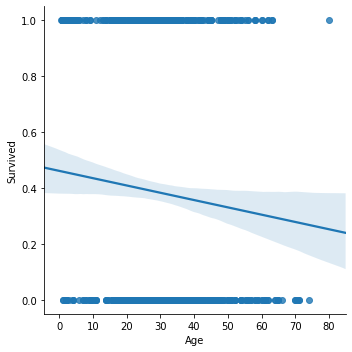

In [612]:
# Explore the relation Age-Survival:

data = data_titanic_train[['Survived','Age']]

sns.lmplot('Age','Survived',data)
 # not a very strong predictor ! but there is a trend 

In [613]:
data = data_titanic_train[['SibSp','Survived']]

data.groupby(['SibSp']).mean()


,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [614]:
data = data_titanic_train[['Parch','Survived']]
data.groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


We are now going, for a given classifier, add more and more variables and see the improvements in the score each one of them brings.....


In [647]:
Y  = data_titanic_train.Survived

In [648]:
 # First classifier: only Sex
X1 = data_titanic_train[['Sex']]

In [649]:
single_best_model = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=0,
                                           n_jobs=-1,
                                           verbose=1)

single_best_model.fit(X1,Y)

print(single_best_model.oob_score_)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.4s finished


0.7867564534231201


In [650]:
X2 = data_titanic_train[['Sex','Pclass']]
 
single_best_model.fit(X2,Y)
print(single_best_model.oob_score_)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.4s finished


0.7104377104377104


In [651]:
X3 = data_titanic_train[['Sex','Age']]

single_best_model.fit(X3,Y3)
print(single_best_model.oob_score_)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.4s finished


0.7968574635241302


In [652]:
X4 = data_titanic_train[['Sex','Age','Fare']]
 
single_best_model.fit(X4,Y4)
print(single_best_model.oob_score_)    


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.5s finished


0.7957351290684624


In [660]:
# Do not retain Fare

In [657]:
X5 = data_titanic_train[['Sex','Age','SibSp']]

single_best_model.fit(X5,Y)
print(single_best_model.oob_score_)
       

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.4s finished


0.8148148148148148


In [658]:
X6 = data_titanic_train[['Sex','Age','SibSp','Parch']]

single_best_model.fit(X6,Y)
print(single_best_model.oob_score_)    
    
    

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.5s finished


0.8226711560044894


In [659]:
X7 = pd.concat([X6, One_hot_encoding_train_Embarked],axis = 1)
#One_hot_encoding_train_Embarked

single_best_model.fit(X7,Y)
print(single_best_model.oob_score_)   

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.3s finished


0.8125701459034792


In [ ]:
 #Do not retain one hot encoding of embarked

In [666]:
 # Prediction :
    
X6 = data_titanic_train[['Sex','Age','SibSp','Parch']]
single_best_model.fit(X6,Y)

X_test = data_titanic_test[['Sex','Age','SibSp','Parch']]
y_pred = single_best_model.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    0.2s finished


In [667]:
  
output = pd.DataFrame({'PassengerId': data_titanic_test['PassengerId'], 'Survived': y_pred})
output.to_csv('my_submission_25.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
 #kaggle competition submit -c titanic -f my_submission20.csv -m "Message"

In [ ]:
# to do: 

# study the impact of Family size
#                  of interaction terms: Age*Pclass 
# make nicer plots to summarize the data